In [1]:
import shutil
import torch
import torch.nn as nn
import numpy as np
import sys
import os 
torch.manual_seed(100)
np.random.seed(100)
import compress_entropy
import generateCompressionImages
from torch.cuda.amp import autocast
from torch.cuda.amp import GradScaler
from JPEGAndEntropyEncoding import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = compress_entropy.Compress().to(device).to(memory_format=torch.channels_last)

#model.load_state_dict(torch.load("./FirstRun/Best/Bestbest_model.pt")['state_dict'])
model.load_state_dict(torch.load("./CE_L1_3/Checkpoints/CE_L1_3_22_checkpoint.pt")['state_dict'])

<All keys matched successfully>

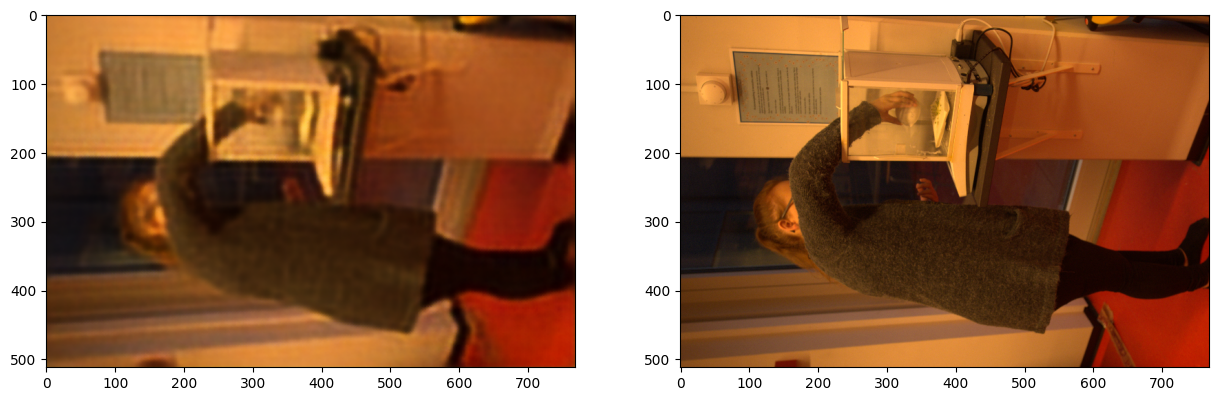

In [2]:
from matplotlib import pyplot as plt
imgs = generateCompressionImages.get_images_without_flips_and_cuts("/work3/s194042/DeepLearningBachelorProject/Code/Image_functions/IMAGE_NEF/IMAGES_1/")
a=0
b=0
for img in imgs:
    if a < 5:
        a += 1
        continue
    a, b = img
    a = model(torch.unsqueeze(a,0))
    break
a = torch.squeeze(a)
a = a.permute(1,2,0)
a = torch.add(torch.multiply(a,128), 128)
a = a.detach().cpu().numpy()
np.clip(a, a_min=0, a_max=255, out=a)
a = np.rint(a)
a = a.astype(np.uint8)


b = b.permute(1,2,0)
b = torch.add(torch.multiply(b,128), 128)
b = b.detach().cpu().numpy()
np.clip(b, a_min=0, a_max=255, out=b)
b = np.rint(b)
b = b.astype(np.uint8)
f, ax = plt.subplots(1,2,figsize=(15, 30))
ax[0].imshow(a)
ax[1].imshow(b)
plt.show()

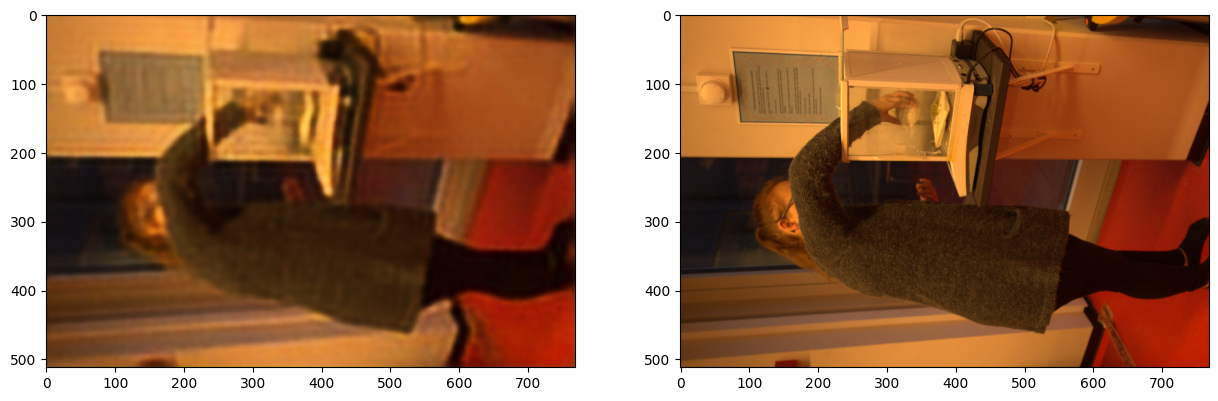

In [3]:
model = compress_entropy.Compress().to(device).to(memory_format=torch.channels_last)

#model.load_state_dict(torch.load("./FirstRun/Best/Bestbest_model.pt")['state_dict'])
model.load_state_dict(torch.load("./CE_L1_2/Checkpoints/CE_L1_2_23_checkpoint.pt")['state_dict'])
from matplotlib import pyplot as plt
imgs = generateCompressionImages.get_images_without_flips_and_cuts("/work3/s194042/DeepLearningBachelorProject/Code/Image_functions/IMAGE_NEF/IMAGES_1/")
a=0
b=0
for img in imgs:
    if a < 5:
        a += 1
        continue
    a, b = img
    a = model(torch.unsqueeze(a,0))
    break
a = torch.squeeze(a)
a = a.permute(1,2,0)
a = torch.add(torch.multiply(a,128), 128)
a = a.detach().cpu().numpy()
np.clip(a, a_min=0, a_max=255, out=a)
a = np.rint(a)
a = a.astype(np.uint8)


b = b.permute(1,2,0)
b = torch.add(torch.multiply(b,128), 128)
b = b.detach().cpu().numpy()
np.clip(b, a_min=0, a_max=255, out=b)
b = np.rint(b)
b = b.astype(np.uint8)
f, ax = plt.subplots(1,2,figsize=(15, 30))
ax[0].imshow(a)
ax[1].imshow(b)
plt.show()

In [4]:
imgs = generateCompressionImages.get_images_without_flips_and_cuts("/work3/s194042/DeepLearningBachelorProject/Code/Image_functions/IMAGE_NEF/IMAGES_1/")
a=0
b=0
for img in imgs:
    if a < 5:
        a += 1
        continue
    a, b = img
    a = model.encode(torch.unsqueeze(a,0))
    break


In [5]:
len(arith_encode_latent_layer(a.flatten(),"")) / 8

94917.125

In [ ]:
80000 / (512 * 768 * 3)

In [6]:
arith_encode_latent_layer(a.flatten(),"")

[1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,


In [10]:
a.flatten()[0:100]

array([ 1,  1,  0,  1,  1,  1,  2,  3,  3,  2,  1,  2,  6,  3,  1,  4,  2,
        4,  4,  0,  5,  2,  2, -2,  1,  1,  1,  1,  2,  2,  3,  3,  2,  1,
        0,  0,  1,  7, -1,  5,  1,  1,  1,  3,  2,  1,  2,  4,  1,  1,  3,
        2,  2,  2,  1,  3,  2,  3,  1,  1,  4,  0,  0,  3,  3,  0,  0,  0,
        0,  0,  0,  0,  1,  3,  3,  2,  1,  1,  2,  5,  2,  0, -1, -2, -1,
        2,  0,  3,  5,  1,  1,  0,  0,  0,  1,  2,  1,  3,  1,  3],
      dtype=int32)